# Network Traffic Dataset

## Setup

### 1. Dataset

Load the dataset: https://www.kaggle.com/code/mayankshekhawat/12212077-exp3-bda

In [1]:
import pandas as pd
import hashlib
import numpy as np

In [2]:
df = pd.read_csv("../data/Network Traffic Dataset/Midterm_53_group.csv")
df.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1


In [5]:
df.count()

Time           394136
Source         394136
No.            394136
Destination    394136
Protocol       394136
Length         394136
Info           394136
dtype: int64

In [55]:
unique_addresses_source = df["Source"].unique()
len(unique_addresses_source)
# unique_addresses_source

372

In [56]:
unique_addresses_dest = df["Destination"].unique()
len(unique_addresses_dest)
# unique_addresses_dest

308

In [46]:
unique_addresses = np.concatenate([unique_addresses_source, unique_addresses_dest])
unique_address = np.unique(unique_addresses)
len(unique_address)

378

In [69]:
def node_number(node_ip:str):
    return np.where(node_ip==unique_address)[0][0]

In [70]:
ind = node_number('74.125.9.169')
ind

np.int64(337)

### 2. Network

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

Convert addresses to nodes and draw edge between corresponded nodes

1. (Optional) Convert source and destination IP addresses to node ids

In [71]:
df['Source_ID'] = df.apply(lambda row: node_number(row.Source), axis = 1)
df.head()

,Time,Source,No.,Destination,Protocol,Length,Info,Source_ID
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>,186
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>,186
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352


In [72]:
df['Dest_ID'] = df.apply(lambda row: node_number(row.Destination), axis = 1)
df.head()

,Time,Source,No.,Destination,Protocol,Length,Info,Source_ID,Dest_ID
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>,186,155
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>,186,155
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352,341
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352,341
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1,352,341


2. Create a graph with all source & destination ids (excluding 'Broadcast')

1. Add nodes

In [79]:
networkG = nx.Graph()
networkG.add_nodes_from(unique_address)
networkG.remove_node('Broadcast') # remove the Broadcast node

2. Add edges

In [82]:
for index, row in df.iterrows():
    networkG.add_edge(row.Source, row.Destination)

3. View the network

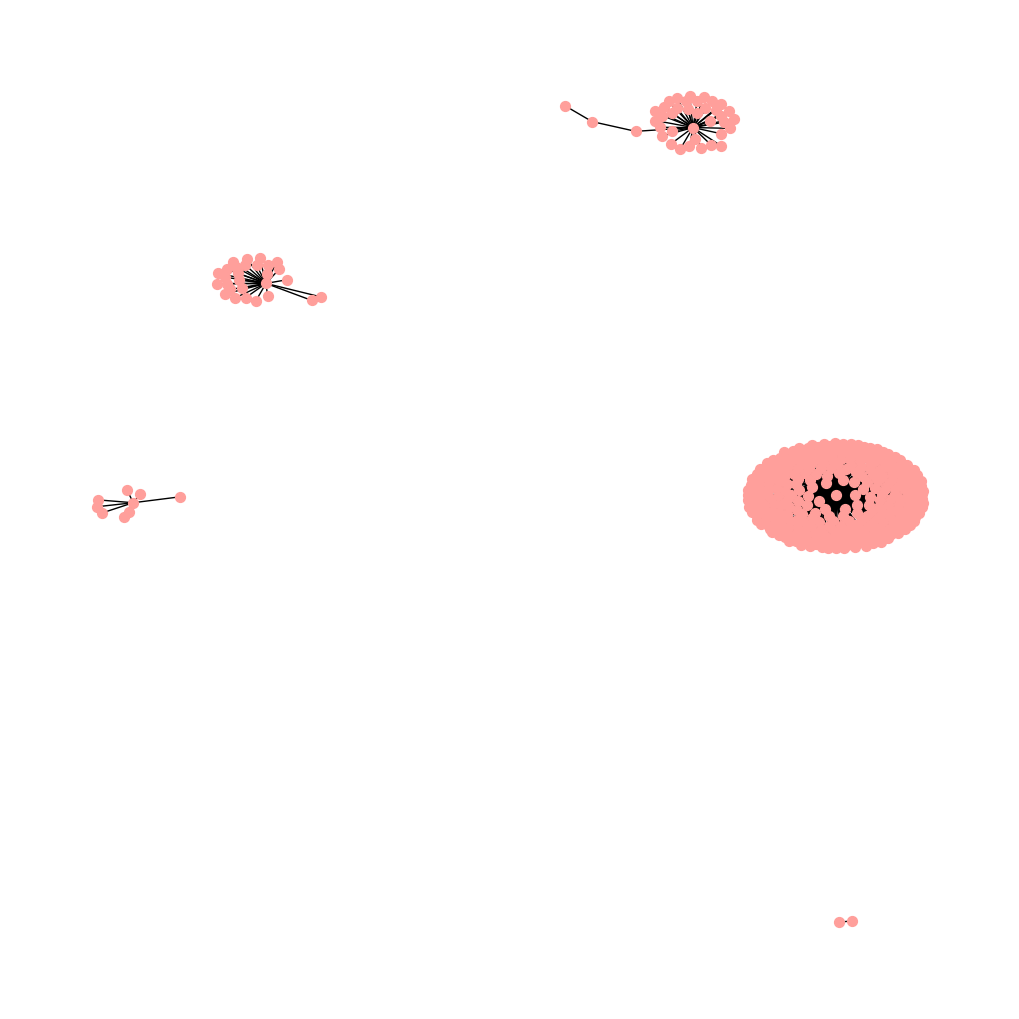

In [83]:
plt.figure(figsize=(10, 10))
nx.draw(networkG,
        node_color='C3',
        node_size=50,
        with_labels=False)
plt.show()

4. Separate out connected components into different graphs

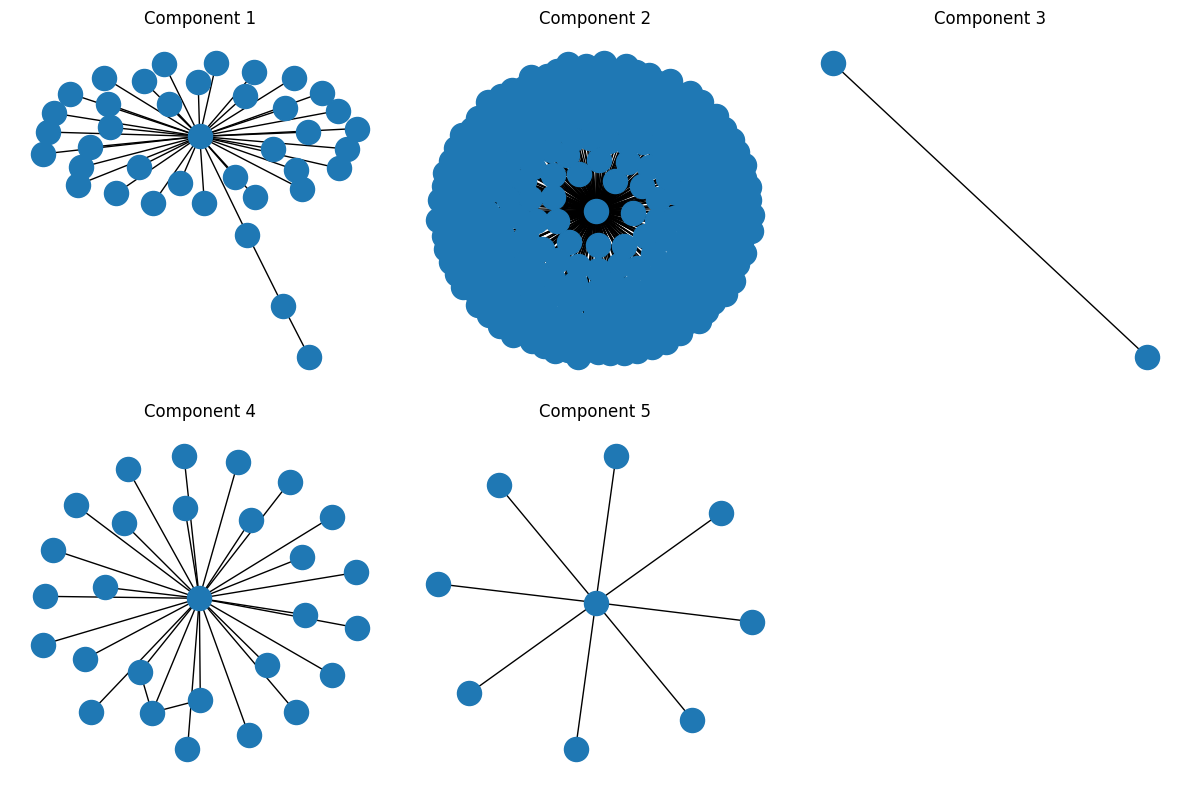

In [93]:
# https://stackoverflow.com/a/61537932
import math
num_components = len(components)
cols = math.ceil(math.sqrt(num_components))
rows = math.ceil(num_components / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten in case of 2D array

# Plot each component
for i, component in enumerate(components):
    ax = axes[i]
    ax.set_title(f"Component {i+1}")
    nx.draw(component, ax=ax, with_labels=False)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()